<a href="https://colab.research.google.com/github/Yaswanth332/netflix-movie-analysis/blob/main/netflix_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/netflix_titles.csv")


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [9]:
df.rating.fillna("NotRated",inplace=True)

In [11]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,0
duration,3


In [13]:
df.dropna(subset=["date_added"],inplace=True)

In [17]:
df["date_added"]=pd.to_datetime(df["date_added"])
df["year_added"]=df["date_added"].dt.year

ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1441. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [20]:
df["date_added"]=pd.to_datetime(df["date_added"],format="mixed")
df['year_added'] = df["date_added"].dt.year

Text(0.5, 1.0, 'count of movies vs tv shpws')

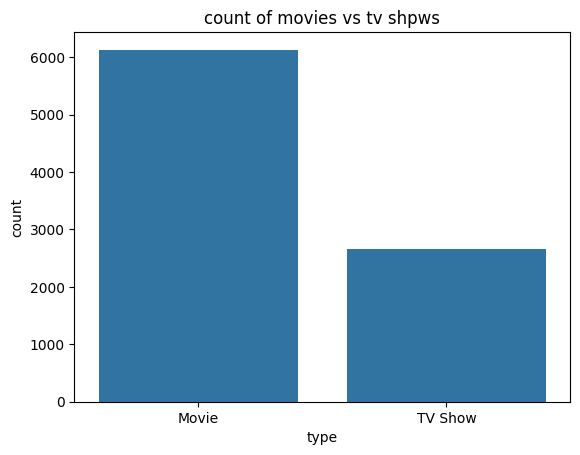

In [21]:
sns.countplot(x="type",data=df)
plt.title("count of movies vs tv shpws")

<Axes: xlabel='year_added'>

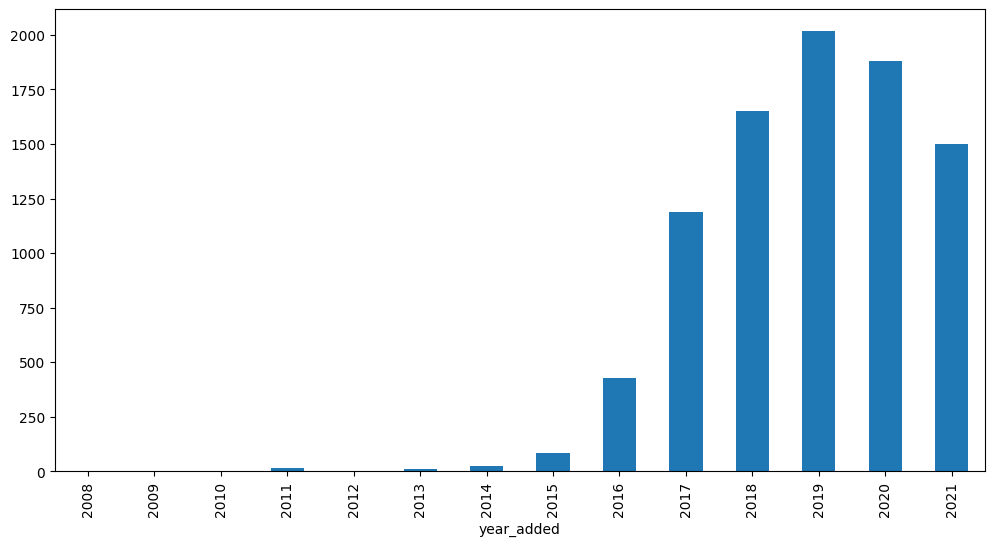

In [22]:
df["year_added"].value_counts().sort_index().plot(kind="bar",figsize=(12,6))

Text(0.5, 1.0, 'Top 10 countries')

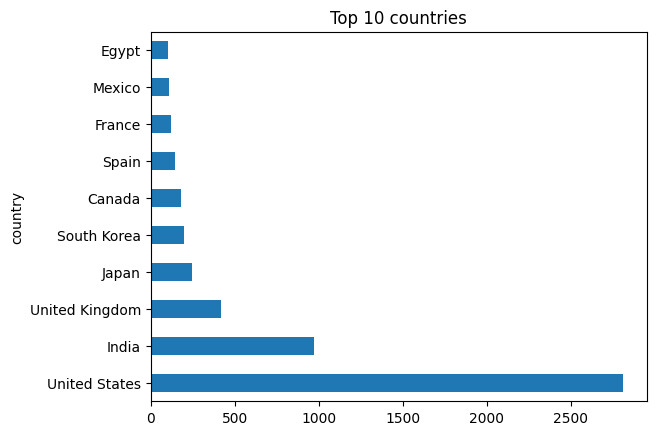

In [27]:
df["country"].value_counts().head(10).plot(kind="barh")
plt.title("Top 10 countries")

Text(0.5, 1.0, 'top 1- geners of netflix')

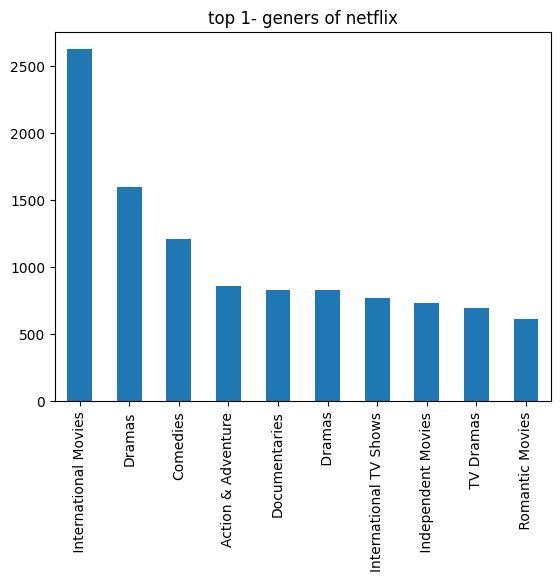

In [28]:
geners=df["listed_in"].str.split(",",expand=True).stack().value_counts().head(10)
geners.plot(kind="bar")
plt.title("top 1- geners of netflix")

In [29]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021


Text(0.5, 1.0, 'Distribution of the rating')

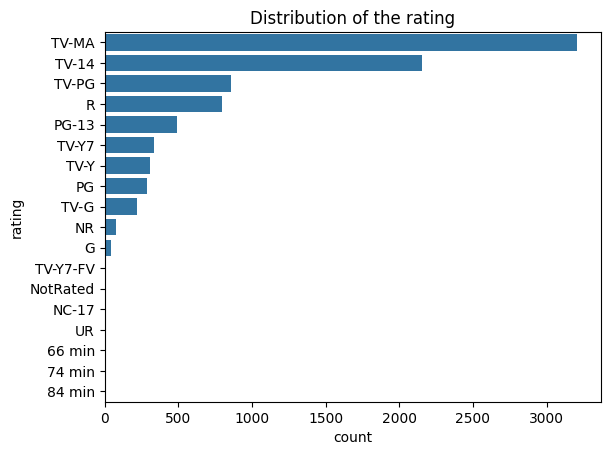

In [35]:
sns.countplot(y="rating",data=df,order=df['rating'].value_counts().index)
plt.title("Distribution of the rating")

Movie distribution analysis

In [36]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


In [37]:
mo_df=df[df["type"]=="Movie"].copy()

In [38]:
mo_df["duration"]=mo_df["duration"].str.replace(" min","").astype(float)

<Axes: ylabel='Frequency'>

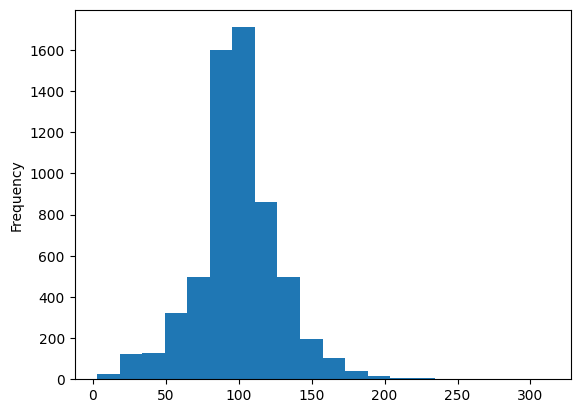

In [39]:
mo_df["duration"].plot(kind="hist",bins=20)

<Axes: >

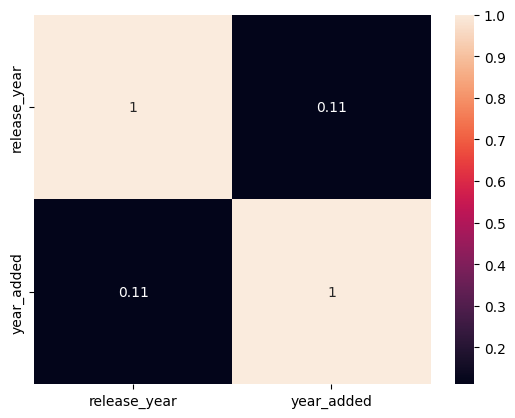

In [40]:
sns.heatmap(df.corr(numeric_only=True), annot=True)


In [42]:
from wordcloud import WordCloud
text=" ".join(df["description"].dropna())

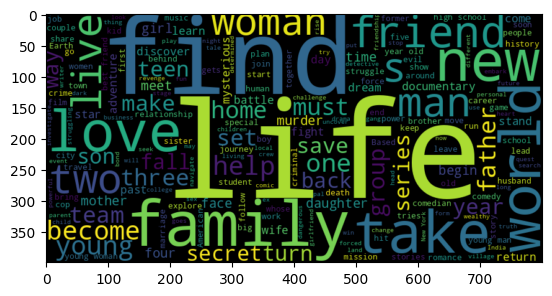

In [45]:
wordcd=WordCloud(width=800,height=400).generate(text)
plt.imshow(wordcd,interpolation="bilinear")

<h1>key insights

Netflix added the most content in 2020

Most content is from US, India, UK

Dramas, Documentaries, and Comedies dominate genres

Ratings like TV-MA and TV-14 are most common

Movies typically range from 80–120 minutes